Ein magisches Quadrat ist ein Quadrat von nxn Zellen, die die Werte von 1 bis nxn enthalten. Dabei sind die Zeilen-, Spalten und Diagonalensummen alle gleich.

Die Variablen sind in der Form x(r,c,v) mit den Zeilen(r)- und Spalten(c)indizes 0-based.

Der Wert(v) ist ebenfalls 0-based und x(r,c,v)=1 heisst somit, dass in der Zeile r+1 und in der Spalte c+1 der Wert v+1 steht.

In [1]:
from dadk.FujitsuQUBOSolver import *
# from dadk.FujitsuQUBOSolverDAU import *
from dadk.FujitsuQUBOSolverEmulatorCPU import *
# from dadk.FujitsuQUBOSolverEmulatorCPUOneHot import *

from dadk.Solution_SolutionList import *
from dadk.BinPol import *

from tabulate import tabulate
import ipywidgets as widgets

def mapColumn(i):
    mapping = {
        0: 0,
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
        6: 2,
        7: 2,
        8: 2,
    }
    return mapping.get(i, 2)

print("\nready")


ready


<table>
    <tr>
        <td><img src="./images/bits-overview.gif"></td>
    </tr>
</table>

In [2]:
N = 9

# magic_constant = N * (N**2 + 1)/2
# print('magic_constant = %d' % magic_constant)
    
var_shape_set = VarShapeSet(BitArrayShape('x', (N, N, 9), one_hot=OneHot.one_way, axis_names=['Row', 'Column', 'Value'])) 

H1 : Nur eine Zahl pro Zelle

<table>
    <tr>
        <td><img src="./images/cell-single.gif"></td>
        <td><img src="./images/cell-all.gif"></td>
    </tr>
</table>
        

In [3]:
H1 = BinPol(var_shape_set)
for r in range(N):
    for c in range(N):
        h = BinPol(var_shape_set).add_term(-1, ())
        for v in range(9):
            h.add_term(1,(('x', r, c, v),))
            # print("In v=", v, " h=", h)
        h.power(2)
        H1.add(h)
       
H1x = var_shape_set.generate_penalty_polynomial('x')
print(H1 == H1x)

True


H2 : In jedem Quadrat Zahl nur einmal

<table>
    <tr>
        <td><img src="./images/row-single.gif"></td>
        <td><img src="./images/row-all.gif"></td>
    </tr>
</table>

In [4]:
H2 = BinPol(var_shape_set)
for i in range(9): #9 quadrate
    for v in range(9):
        h = BinPol(var_shape_set).add_term(-1, ())
        for r in range(3):
            for c in range(3):
                h.add_term(1,(('x', r + (i%3)*3, c + mapColumn(i)*3, v),))
        # print("In v=", v, " h=", h)
        h.power(2)
        H2.add(h)
        
# H2x = var_shape_set.generate_penalty_polynomial('x')
# print(H2 == H2x)
# print("H2 ", H2)
# print("H2x: ", H2x)

0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
3
3
3
4
4
4
5
5
5
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
6
6
6
7
7
7
8
8
8
0
0
0
1
1
1
2
2
2
0
0
0
1
1


H3 : Jede Spaltensumme == magic_constant

<table>
    <tr>
        <td><img src="./images/column-single.gif"></td>
        <td><img src="./images/column-all.gif"></td>
    </tr>
</table>

In [5]:
H3 = BinPol(var_shape_set)
h = BinPol(var_shape_set).add_term(-1, ())
h.add_term(1,(('x', 0, 0, 0),))
h.add_term(1,(('x', 0, 1, 8),))
h.power(2)
H3.add(h)


"""H3 = BinPol(var_shape_set)
for c in range(N):
    h = BinPol(var_shape_set).add_term(-magic_constant, ())
    for r in range(N):
        for v in range(N*N):
            h.add_term(v+1,(('x', r, c, v),))
    h.power(2)
    H3.add(h)
    
H3x = BinPol.sum( (BinPol.sum(Term(v+1, (('x', r, c, v),), var_shape_set=var_shape_set) for v in range(N*N) for r in range(N) ) - magic_constant) ** 2 for c in range(N) )
print(H3 == H3x)"""

"H3 = BinPol(var_shape_set)\nfor c in range(N):\n    h = BinPol(var_shape_set).add_term(-magic_constant, ())\n    for r in range(N):\n        for v in range(N*N):\n            h.add_term(v+1,(('x', r, c, v),))\n    h.power(2)\n    H3.add(h)\n    \nH3x = BinPol.sum( (BinPol.sum(Term(v+1, (('x', r, c, v),), var_shape_set=var_shape_set) for v in range(N*N) for r in range(N) ) - magic_constant) ** 2 for c in range(N) )\nprint(H3 == H3x)"

H4 & H5 : Die Diagonalensummen == magic_constant

<table>
    <tr>
        <td><img src="./images/diagonal_1.gif"></td>
        <td><img src="./images/diagonal_2.gif"></td>
    </tr>
</table>

In [6]:
"""H4 = BinPol(var_shape_set).add_term(-magic_constant, ())
for i in range(N):
    for v in range(N*N):
        H4.add_term(v+1,(('x', i, i, v),))
H4.power(2)

H4x = (BinPol.sum(Term(v+1, (('x', i, i, v),), var_shape_set=var_shape_set) for v in range(N*N) for i in range(N) ) - magic_constant) ** 2
print(H4 == H4x)

H5 = BinPol(var_shape_set).add_term(-magic_constant, ())
for i in range(N):
    for v in range(N*N):
        H5.add_term(v+1,(('x', i, N-i-1, v),))
H5.power(2)

H5x = (BinPol.sum(Term(v+1, (('x', i, (N-1)-i, v),), var_shape_set=var_shape_set) for v in range(N*N) for i in range(N) ) - magic_constant) ** 2
print(H5 == H5x)"""

"H4 = BinPol(var_shape_set).add_term(-magic_constant, ())\nfor i in range(N):\n    for v in range(N*N):\n        H4.add_term(v+1,(('x', i, i, v),))\nH4.power(2)\n\nH4x = (BinPol.sum(Term(v+1, (('x', i, i, v),), var_shape_set=var_shape_set) for v in range(N*N) for i in range(N) ) - magic_constant) ** 2\nprint(H4 == H4x)\n\nH5 = BinPol(var_shape_set).add_term(-magic_constant, ())\nfor i in range(N):\n    for v in range(N*N):\n        H5.add_term(v+1,(('x', i, N-i-1, v),))\nH5.power(2)\n\nH5x = (BinPol.sum(Term(v+1, (('x', i, (N-1)-i, v),), var_shape_set=var_shape_set) for v in range(N*N) for i in range(N) ) - magic_constant) ** 2\nprint(H5 == H5x)"

und jeder Wert soll nur einmal vorkommen

In [7]:
"""H6 = BinPol(var_shape_set)
for v in range(N*N):
    h = BinPol(var_shape_set).set_term(-1)
    for r in range(N):
        for c in range(N):
            h.add_term(1,(('x', r, c, v),))
    h.power(2)
    H6.add(h)
    
H6x = BinPol.sum( (BinPol.sum(Term(1, (('x', r, c, v),), var_shape_set=var_shape_set) for c in range(N) for r in range(N) ) - 1) ** 2 for v in range(N*N) )
print(H6 == H6x)"""

"H6 = BinPol(var_shape_set)\nfor v in range(N*N):\n    h = BinPol(var_shape_set).set_term(-1)\n    for r in range(N):\n        for c in range(N):\n            h.add_term(1,(('x', r, c, v),))\n    h.power(2)\n    H6.add(h)\n    \nH6x = BinPol.sum( (BinPol.sum(Term(1, (('x', r, c, v),), var_shape_set=var_shape_set) for c in range(N) for r in range(N) ) - 1) ** 2 for v in range(N*N) )\nprint(H6 == H6x)"

In [8]:
solverCPU = FujitsuQUBOSolverEmulatorCPU( # FujitsuQUBOSolverEmulatorOneHotCPU or FujitsuQUBOSolverEmulatorCPU
            number_iterations=200*1000,
            number_runs=1,

            expert_mode=True,
            temperature_start=10000,
            temperature_end=1,
            temperature_mode=0,
            offset_increase_rate=20,

            solution_mode='COMPLETE',
            optimization_method=OM_ANNEALING,
    
            graphics=GraphicsDetail.ALL,

            annealer_version=2,
            bit_precision=16)

""" solverDAU = FujitsuQUBOSolverDAU(
            number_iterations=10*1000*1000,
            number_runs=128,

            expert_mode=True,
            temperature_start=10000,
            temperature_end=1,
            temperature_mode=0,
            offset_increase_rate=20,

            solution_mode='COMPLETE',
            optimization_method=OM_ANNEALING,

            use_access_profile=True,
            annealer_version=2,
            bit_precision=16) """
    
solver = solverCPU

In [9]:
qubo = 100*H1 + H2 + H3 # + H4 + H5 + 100*H6
solution_list = solver.minimize(qubo) 

In [10]:
for solution in solution_list.get_solution_list():   
    if qubo.compute(solution.configuration) == 0:
    
        magic_square = np.full((N,N), -1) 
    
        config_bits = VarSet(solution.configuration, var_shape_set)
        start_table = config_bits.extract_bit_array('x')
        for r in range(N):
            for c in range(N):
                for v in range(9):
                    if start_table.data[r, c, v]:
                        magic_square[r][c] = (v+1)

        display(widgets.HTML('<h4>frequency %d</h4>' % solution.frequency))
        print(tabulate(magic_square, tablefmt="fancy_grid"))
    else:
        print('not a valid solution')

not a valid solution


Input parameters
  Total number of iterations per run________: 200000
  number_runs_______________________________: 1
  Number of replicas________________________: 26
  Temperature mode__________________________: 0
  Temperature mode text_____________________: EXPONENTIAL
  Start temperature_________________________: 10000.0
  Final temperature (mode 3)________________: 1.0
  Temperature decay (mode 0)________________: 0.004596875798083211
  Temperature interval (mode 0)_____________: 100
  Dynamic energy offset_____________________: 20.0
  Solution mode_____________________________: COMPLETE
  Optimization method_______________________: annealing
  Annealer version__________________________: 2
  Bit precision_____________________________: 16
  Processor_________________________________: CPU
  graphics.value____________________________: 2
  graphics.name_____________________________: ALL
  Noise model_______________________________: METROPOLIS
Runtime
  Execution technology____________

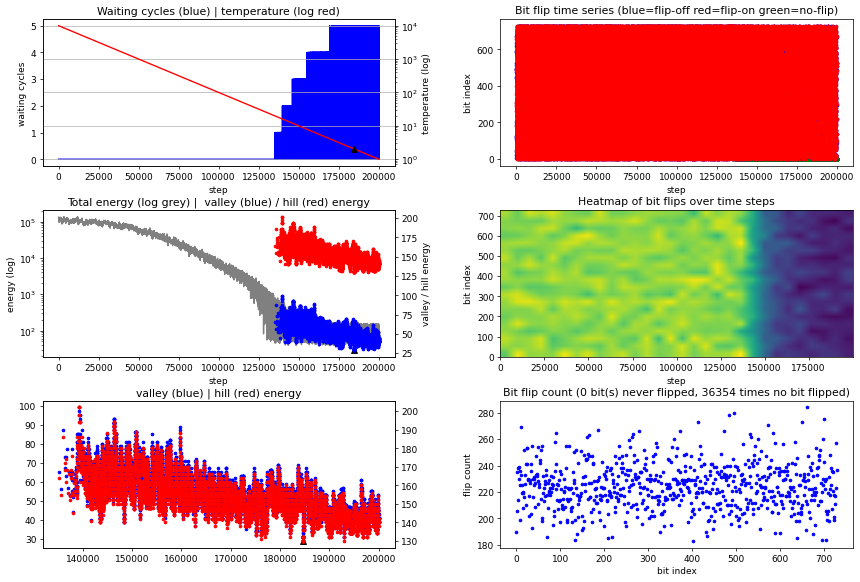

In [11]:
solution_list.print_stats()
solution_list.print_graphs()